In [1]:
from keras.datasets import reuters

# 로이터 뉴스 데이터 로딩, num_words 사용할 상위 단어수, maxlen  상위 1000개 단어

(X_train, y_train), (X_test, y_test) = reuters.load_data( num_words=1000,test_split=0.2)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
from tensorflow.keras.preprocessing import sequence

# 가장 긴 길이를 기준으로 사이즈를 맞추고 남는 부분을 0으로 채움

X_train = sequence.pad_sequences(X_train, maxlen=50)

X_test = sequence.pad_sequences(X_test, maxlen=50)

In [3]:
from tensorflow.python.keras.utils import np_utils

#원핫인코딩

y_train = np_utils.to_categorical(y_train)

y_test = np_utils.to_categorical(y_test)

In [4]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

maxlen=50

model = Sequential()

# 임베딩 레이어 Embedding(단어의개수, 벡터크기, 입력사이즈)

model.add(Embedding(1000,100, input_shape=(maxlen,))) #1000개의 단어가 입력되어 100차원으로 출력

# 문장을 단어들의 시퀀스로 간주하고 순환 레이어의 입력으로, 출력노드수 100

model.add(LSTM(100)) # Long Short-Term Memory

model.add(Dense(46, activation='softmax')) #46개의 뉴스 카테고리

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

c:\python312\Lib\site-packages\keras\src\layers\core\embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
from keras.callbacks import EarlyStopping

early_stopping=EarlyStopping(patience=3)

hist=model.fit(X_train,y_train,batch_size=128,epochs=100,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.3228 - loss: 3.0842 - val_accuracy: 0.4569 - val_loss: 2.1941
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.4715 - loss: 2.1030 - val_accuracy: 0.4886 - val_loss: 2.0257
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.4997 - loss: 1.9295 - val_accuracy: 0.5008 - val_loss: 1.9389
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5276 - loss: 1.7892 - val_accuracy: 0.5403 - val_loss: 1.7993
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5546 - loss: 1.7228 - val_accuracy: 0.5637 - val_loss: 1.7424
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5953 - loss: 1.5550 - val_accuracy: 0.5799 - val_loss: 1.6575
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6157 - loss: 1.4973 - val_accuracy: 0.6004 - val_loss: 1.5942
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6317 - loss: 1.4194 - val_accuracy: 0.

In [6]:
print("\n 정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6522 - loss: 1.4438

 정확도 : 0.6545


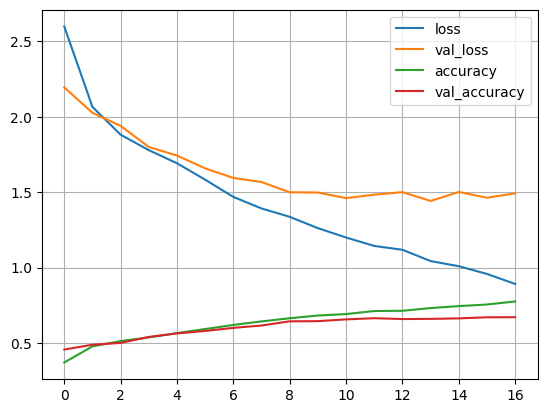

In [7]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])

plt.plot(hist.history['val_loss'])

plt.plot(hist.history['accuracy'])

plt.plot(hist.history['val_accuracy'])

plt.legend(['loss','val_loss','accuracy','val_accuracy'])

plt.grid()

plt.show()

In [8]:
import numpy as np

pred=model.predict(X_test)

np.argmax(pred[12])

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


1

In [9]:
np.argmax(y_test[12])

1